# Demo 2: Neighborhood Classifiers, Training and Test set, Decision boundaries. 19/09

Last week you implemented the 1 nearest neighbor (1-NN) algorithm. This week you will implement the KNN algorithm and the Parzen windows algorithm with hard neighborhood. On top of this, we will touch upon training and test sets, as well as decision boundaries.

- Your first step is to remember how KNN and Parzen windows work.
- You will need to implement a function that evaluates the [confusion matrix](http://en.wikipedia.org/wiki/Confusion_matrix) given true labels and predicted labels.
- We provide you with the boilerplate code in which you will need to insert your KNN and Parzen windows implementations. This way you will be able to focus on the actual algorithm itself and you will not have to worry about things as printing or displaying results.
- Once your implementation is correct, you will try different values of $k$ (number of neighbors) and pick the best ones.

Familiarize yourself with the code in the following 5 sections:
   - **Utility Functions:** Defines helper functions such as for visualization, evaluation, etc. This is where you will implement the confusion matrix function.
   - **NeighborhoodClassifier class:** This is where you will implement the KNN and Parzen windows classifiers.
   - **Loading and splitting the data:** Loads a dataset and splits it into two parts (train, test).
   - **Initialization and training of classifiers:** Trains a KNN/Parzen windows model on the train dataset and obtains predictions on the test set.
   - **Confusion matrix and decision boundary:** Displays the confusion matrix and visualizes the decision boundary of our trained classifiers.
   - **Trying different values of $k$ for k-NN:** This is where you will fill in the function `get_test_error`, that would help plot the test error as a function of the number of neighbors (the plotting code is provided for you).

**Your objective for this demo session** is to understand the general functioning of the code below and then to fill in the functions `conf_mat`, `NeighborhoodClassifier.compute_predictions()`, and `get_test_error`. All the places where you have to insert code are signaled by a `pass` statement.

<hr />

La semaine dernière vous avez implanté un 1-Plus-Proche-Voisin (1-PPV). Cette semaine vous implanterez un K-PPV et la méthode de Parzen. Par contre, cette semaine nous ferons aussi appel à la notion d'ensembles d'entrainement et de test, ainsi qu'à la notion de surface de décision. 

- Votre première étape est de vous remémorer le fonctionnement du K-PPV et de la méthode de Parzen.
- Vous implanterez une fonction qui évalue la [matrice de confusion](http://fr.wikipedia.org/wiki/Matrice_de_confusion), etant données les vraies étiquettes et les étiquettes prédites. 
- Nous fournissons le cadre général où il vous faudra insérer le code de k-ppv et de la méthode de Parzen. On y retrouve notamment des fonctions pour rendre certaines tâches (comme l'affichage des résultats) plus faciles. Cela vous permettra de vous concentrer sur la partie algorithmique de ces méthodes.
- Vous essaierez différentes valeurs pour le nombre de voisins, et vous choisirez la meilleure.
Familiarisez-vous avec le code des cinq sections suivantes:
    - **Fonctions utilitaires:** définit des fonctions utiles (visualisation, évaluation). C'est ici que vous implanterez la fonction qui évalue la matrice de confusion.
    - **Classe NeighborhoodClassifier:** c'est ici que vous devez implanter les classifieurs.
    - **Chargement et division des données:** charge un jeu de données et le divise en deux parties (train, test).
    - **Initialisation et entraînement des classifieurs:** entraîne un modèle k-PPV et Parzen sur les données d'entraînement et obtient les prédictions des étiquettes pour les données de test.
    - **Matrice de confusion et surface de décision:** Affiche la matrice de confusion et visualise la surface de décision pour les deux classifieurs
    - **Essayez differentes valeurs de $k$ pour k-PPV:** C'est ici que vous implanterez la fonction `get_test_error`, qui aide à tracer la courbe de l'erreur sur le test en fonction du nombre de voisins (le code pour tracer cette courbe est déjà fourni).

**Votre objectif pour la séance** est de comprendre le fonctionnement général du code fourni puis de compléter les fonctions `conf_mat`, `NeighborhoodClassifier.compute_predictions()`, et `get_test_error`.
Inserez du code a chaque assertion `pass`.


### Python classes / Classes en python

For this demo, we will implement both KNN and Parzen windows as a **class** (one class for both algorithms). You can read this [tutorial](http://docs.python.org/3/tutorial/classes.html) if you are not familiar with the concept of classes in Object-oriented programming or its syntax in python. The class `NeighborhoodClassifier` is already partially implemented. All that you have left to do to implement the classifiers is to write the method `compute_predictions`.

<hr />

Pour cette démo, nous implémenterons k-ppv et la méthode de Parzen à l'intérieure d'une **classe** (une seule classe pour les deux algorithmes). Vous pouvez lire ce [tutoriel](http://docs.python.org/3/tutorial/classes.html) si vous n'êtes pas à l'aise avec les classes en python. La classe `NeighborhoodClassifier` est déjà partiellement implémentée, il ne vous reste qu'à compléter la méthode `compute_predictions` pour obtenir vos classifieurs.


## Utility Functions / Fonctions utilitaires

In [2]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt
import time
import sys
IN_COLAB = 'google.colab' in sys.modules

This functions calculates the Minkowski distance between a vector x and a matrix Y. Does this remind you of anything?
<hr/>
Cette fonction calcule la distance Minkowski entre un vecteur x et une matrice Y. Ça vous rappelle quelque chose?

In [3]:
def minkowski_mat(x, Y, p=2):
    return (np.sum((np.abs(x - Y)) ** p, axis=1)) ** (1.0 / p)

The function `conf_matrix` takes as input:

- `testlabels` - test labels
- `predlabels` - prediction labels
and returns a table presenting the results.

We initialize the matrix with zeros. Your job is to loop through the labels (true labels and predicted ones) to update the values of the matrix.

<hr/>
La fonction `conf_matrix` prend en entrée:

 - `testlabels` - les étiquettes de test
 - `predlabels` - les étiquettes prédites
et retourne une table présentant les résultats.

On initialise la matrice avec des zéros. Vous devrez passer sur les étiquettes de test et les étiquettes prédites pour mettre à jour les valeurs de la matrice.

In [4]:
def conf_matrix(testlabels, predlabels):

    n_classes = int(max(testlabels))
    matrix = np.zeros((n_classes, n_classes))

    for (test, pred) in zip(testlabels, predlabels):
        matrix[int(test - 1), int(pred - 1)] += 1

    return matrix

The function `gridplot` takes as input:

- `classifier` - a classifier such as `NeighborhoodClassifier`
- `train` - a training set
- `test` - a test set
- `n_points` - the width/height of the grid on which to visualize the decision boundary (n, n)

Depending on the speed of your computer, calculating of predictions on the grid can be slow. We recommend doing the first tests with a small grid (say, 25 by 25). You could then augment the size of the grid to 50x50 or even 100x100 to obtain better looking visualizations.

<hr/>

La fonction `gridplot` prend en entrée:

 - `classifier` - un classifieur tel que `NeighborhoodClassifier`
 - `train` - un ensemble d'entraînement
 - `test` - un ensemble de test
 - `n_points` - la taille de la grille pour afficher la surface de décision (n,n)

Dépendamment de la puissance de calcul de votre ordinateur, le calcul des prédictions sur la grille peut être lent. Il est préférable de faire vos premiers tests avec une grille moins fine, disons de 25 par 25. Vous pourrez ensuite augmenter la valeur à 50 ou même 100 pour obtenir de plus beaux graphiques.

In [5]:
# function plot
def gridplot(classifier, train, test, n_points=50):

    train_test = np.vstack((train,test))
    (min_x1,max_x1) = (min(train_test[:, 0]) - .25, max(train_test[:, 0]) + .25)
    (min_x2,max_x2) = (min(train_test[:, 1]) - .25, max(train_test[:, 1]) + .25)

    xgrid = np.linspace(min_x1, max_x1,num=n_points)
    ygrid = np.linspace(min_x2, max_x2,num=n_points)

    # calculates the cartesian product between two lists and stores the result in an array
    thegrid = np.array(combine(xgrid, ygrid))

    predictedClasses = classifier.compute_predictions(thegrid)

    # The grid
    plt.pcolormesh(xgrid, ygrid, predictedClasses.reshape((n_points, n_points)).T, cmap=plt.cm.cool, alpha=.1)
    # Training data points
    plt.scatter(train[:, 0], train[:, 1], c=train[:,-1], cmap=plt.cm.cool, marker='v', s=70, label='train')
    # Test data points
    plt.scatter(test[:, 0], test[:, 1], c=test[:,-1], cmap=plt.cm.cool, marker='s', s=70, label='test')

    plt.legend()
    plt.show()
    
# http://code.activestate.com/recipes/302478/
def combine(*seqin):
    '''returns a list of all combinations of argument sequences.
    for example: combine((1,2),(3,4)) returns
    [[1, 3], [1, 4], [2, 3], [2, 4]]'''
    def rloop(seqin,listout,comb):
        '''recursive looping function'''
        if seqin:                       # any more sequences to process?
            for item in seqin[0]:
                newcomb=comb+[item]     # add next item to current comb
                # call rloop w/ rem seqs, newcomb
                rloop(seqin[1:], listout, newcomb)
        else:                           # processing last sequence
            listout.append(comb)        # comb finished, add to list
    listout=[]                      # listout initialization
    rloop(seqin,listout,[])         # start recursive process
    return listout

## NeighborhoodClassifier Class

The class `NeighborhoodClassifier` takes as parameters:

- `parzen` - if set to True, the classifier is a Parzen windows one ; otherwise, the classifier is KNN
- `dist_func` - a function to calculate the distance between points
- `k` - the number of neighbors to visit (For knn only)
- `radius` - the radius that defines the Parzen Windows (For Parzen windows only)

The method `train` is actually really only storing the dataset. All of the work is done at prediction time for `NeighborhoodClassifier`  models.

The method `compute_predictions` takes as input the unlabeled test set in matrix form and returns the array containing the predictions. The returned array is one-dimensional and has `n_examples` elements.

You will need, for each test set example, to:

 - **Calculate distances** for every point of the training set (using dist_func)
 - Look through the distances to **find the $k$ nearest neighbors** (or **find the training points belonging to the ball of the wanted radius** in the case of a Parzen windows classifier) of the current test example
 - **Calculate the number of neighbors per class** and save them in `counts`
 - **Evaluate the predicted class** from `counts` and save it in `classes_pred`
 

For Parzen classifiers, sometimes the test example is far from train examples, and the list of neighbors would then be empty. **One way to deal with such test examples is to double the radius until the list of neighbors contains at least one element.** Randomly selecting the label for such test examples is a common alternative.

<hr/>

La classe `NeighborhoodClassifier` prend en paramètre:

- `parzen` - si ce booléen est True, alors le classifieur implémente la méthode de Parzel; sinon, il implémente k-ppv. 
 - `dist_func` - une fonction pour calculer la distance des points
 - `k` - le nombre de voisin à visiter (Pour k-ppv seulement)
 - `radius` - le rayon qui définit les fenêtres de Parzen (Pour Parzen seulement)

La méthode `train` n'est en fait que le stockage de l'ensemble d'entraînement. Tout le travail des modèles `NeighborhoodClassifier` s'effectue lors de la prédiction. 

La méthode `compute_predictions` prend en entré une matrice de données de test (sans étiquettes) et retourne une liste uni-dimensionnelle de taille `n_examples` contenant les prédictions.

Vous devrez pour chaque point de l'ensemble de test :

 - **calculer les distances** à tous les points de l'ensemble d'entraînement (en utilisant dist_func)
 - parcourir les distances pour **trouver les $k$ voisins** du point de test courant (ou **trouver les points appartenant à la boule du rayon donné** dans le cas de la méthode de Parzen)
 - **dénombrer les voisins** correspondant à chaque classe et les sauvegarder dans `counts`
 - **évaluer l'étiquette prédite** à partir de `counts`, et la sauvegarder dans `classes_pred`

Pour la méthode de Parzen, il arrive que l'exemple test soit loin des exemples d'entraînement, rendant ainsi la liste des voisins vide. **Une façon de contourner le problème serait de doubler le rayon jusqu'à ce que la liste des voisins contienne au moins un élément**. Une solution alternative serait d'assigner une étiquette de façon aléatoire à ces éléments-là.


In [15]:
class NeighborhoodClassifier:
    def __init__(self, parzen=False, dist_func=minkowski_mat, k=1, radius=0.4):
        self.parzen = parzen
        self.dist_func = dist_func
        self.k = k
        self.radius = radius

    # The train function for knn / Parzen windows is really only storing the dataset
    def train(self, train_inputs, train_labels):
        self.train_inputs = train_inputs
        self.train_labels = train_labels
        self.n_classes = len(np.unique(train_labels))

    # The prediction function takes as input test_data and returns an array containing the predicted classes. 
    def compute_predictions(self, test_data):
        # Initialization of the count matrix and the predicted classes array
        num_test = test_data.shape[0]
        counts = np.ones((num_test, self.n_classes))
        classes_pred = np.zeros(num_test)

        # For each test datapoint
        for (i, ex) in enumerate(test_data):
            # i is the row index
            # ex is the i'th row

            # Find the distances to each training set point using dist_func
            distances = self.dist_func(ex, self.train_inputs)
        
            list_of_kn = []
            # Go through the training set to find the neighbors of the current point (ex)
            # You will distinguish between Parzen and KNN here
            if self.parzen: 
                r = self.radius
                while len(list_of_kn) == 0:
                    list_of_kn = np.array([j for j in range(len(distances)) if distances[j] < r])# j ici est l'indice dans distances
            else:
                list_of_kn = np.argsort(distances)[:self.k]#liste du plus plus près datapoint voisins au plus éloigné, tout ca au nombre de k datapoints les plus près 
            
            #trouvons les classes associées aux k point les plus près de ex
            class_of_kn = self.train_labels[list_of_kn]
            classes_in_kn, counts_for_classes_in_kn = np.unique(class_of_kn, return_counts=True)
            classes_pred[i] = classes_in_kn[np.argmax(counts_for_classes_in_kn)]


        return classes_pred

## Loading and splitting the data / Chargement et division des données

The `iris` dataset is divided into two parts, one for training and the other for testing.
It is important to shuffle randomly the dataset before splitting it. Can you tell why?

Only two columns of the dataset are used for this lab (the goal is to visualize them in 2-dimensions).

<hr/>

L'ensemble de donnée `iris` est divisé en deux parties, une pour l'entraînement et l'autre pour éffectuer des tests. Il est important de mélanger aléatoirement l'ensemble de données avant d'éffectuer la division. Pouvez-vous dire pourquoi? 

Seulement deux colonnes des données sont utilisées dans cette démo (afin de pouvoir les visualiser en deux dimensions).

In [16]:
# load iris
iris = np.loadtxt('iris.txt')
data = iris

# Number of classes
n_classes = 3
# Size of training set
n_train = 100

# The columns (features) on which to train our model
# For gridplot to work, len(train_cols) should be 2
train_cols = [0, 1]
# The index of the column containing the labels
target_ind = [data.shape[1] - 1]

# Comment to have random (non-deterministic) results
random.seed(3395)
# Randomly choose indexes for the train and test dataset
inds = list(range(data.shape[0]))
random.shuffle(inds)
train_inds = inds[:n_train]
test_inds = inds[n_train:]

# Split the data into both sets
train_set = data[train_inds, :]
train_set = train_set[:, train_cols + target_ind]
test_set = data[test_inds, :]
test_set = test_set[:, train_cols + target_ind]

# Separate the test set into inputs and labels
test_inputs = test_set[:, :-1]
test_labels = test_set[:, -1].astype('int32')
train_inputs = train_set[:, :-1]
train_labels = train_set[:, -1].astype('int32')

## Initialization and training of the classifiers / Initialisation et entraînement des classifieurs


In [18]:
# Number of neighbors (k) for knn
k = 3
radius = 0.9
print("We will train ", k, "-NN and a Parzen classifier with radius ", radius, " on ", n_train, " training examples")

# Create the classifiers
knn = NeighborhoodClassifier(parzen=False, k=k)
parzen = NeighborhoodClassifier(parzen=True, radius=radius)

# We train the models
knn.train(train_inputs, train_labels)
parzen.train(train_inputs, train_labels)

# We get predictions
t1 = time.process_time()
classes_pred_knn = knn.compute_predictions(test_inputs)
t2 = time.process_time()
print('It took knn ', t2 - t1, ' seconds to get the predictions on ', test_inputs.shape[0],' test set examples')
t1 = time.process_time()
classes_pred_parzen = parzen.compute_predictions(test_inputs)
t2 = time.process_time()
print('It took Parzen ', t2 - t1, ' seconds to get the predictions on ', test_inputs.shape[0],' test set examples')

We will train  3 -NN and a Parzen classifier with radius  0.9  on  100  training examples
It took knn  0.0  seconds to get the predictions on  50  test set examples
It took Parzen  0.0  seconds to get the predictions on  50  test set examples


## Confusion matrix and decision boundary / Matrice de confusion et surface de décision

Here we define a function that given a model and a prediction array, prints the confusion matrix, which is very useful for analyzing which classes our classifier is having a hard time predicting. It also creates a graph displaying the training points as well as the test points and the decision boundary of our model. We try this function on the predictions made by both classifiers. We run this function on the two classifiers we trained in the previous section.

Before moving on to the next section, please make sure that your implementation works well by executing this code. Do not hesitate to ask questions if you have trouble interpreting the confusion matrix or the graph.

<hr/>

On définit ici une fonction qui prend en paramètre un modèle et ses prédiction et imprime la matrice de confusion, très utile pour comprendre quelles classes sont moins bien prédites par notre classifieur. Elle crée aussi un graphique qui affiche les points d'entraînement ainsi que ceux de test et la surface de décision de notre modèle. On exécute cette fonction sur les deux classifieurs entraînés à la section précédente.

Avant de passer à la section suivante, assurez-vous que votre implémentation fonctionne bien en exécutant ce code. N'hésitez surtout pas à poser des questions si vous avez de la difficulté à interpréter la matrice de confusion et le graphique.

The confusion matrix is:
[[18.  0.  0.]
 [ 0. 12.  6.]
 [ 0.  5.  9.]]
The test error is  22.0 %


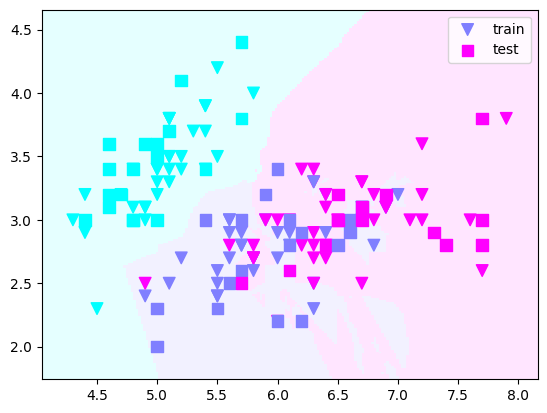

It took  0.98  seconds to calculate the predictions on 40000  points of the grid
We will save the plot into grid__k=3_c1=0_c2=1.png
The confusion matrix is:
[[18.  0.  0.]
 [ 1. 12.  5.]
 [ 0.  2. 12.]]
The test error is  16.0 %


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [20]:
def show_results(model, classes_pred):
    # Confusion Matrix
    confmat = conf_matrix(test_labels, classes_pred)
    print('The confusion matrix is:')
    print(confmat)

    # Test error
    sum_preds = np.sum(confmat)
    sum_correct = np.sum(np.diag(confmat))
    print("The test error is ", round(100 * (1.0 - (float(sum_correct) / float(sum_preds))), 2), "%")

    # The grid size will be = grid_size x grid_size
    grid_size = 200

    if len(train_cols) == 2:
        # Decision boundary
        t1 = time.process_time()
        gridplot(model, train_set, test_set, n_points=grid_size)
        t2 = time.process_time()
        print('It took ', round(t2 - t1, 2), ' seconds to calculate the predictions on', grid_size * grid_size,
              ' points of the grid')
        if model.parzen:
            filename = 'grid_' + '_radius=' + str(model.radius) + '_c1=' + str(train_cols[0]) + '_c2=' + str(
                train_cols[1]) + '.png'
        else:
            filename = 'grid_' + '_k=' + str(model.k) + '_c1=' + str(train_cols[0]) + '_c2=' + str(
                train_cols[1]) + '.png'
        print('We will save the plot into {}'.format(filename))
        plt.savefig(filename, format='png')
    else:
        print('Too many dimensions (', len(train_cols), ') to print the decision boundary')

show_results(knn, classes_pred_knn)
show_results(parzen, classes_pred_parzen)

## Trying different values of k for k-NN / Essayez differentes valeurs de $k$ pour k-NN


Now that your implementation is correct, we can train different k-NN classifiers, and choose the best value for $k$. The way we are going to do this is to plot the test error as a function of $k$, and use the plot to pick the best value. However, this method has a shortcoming (**what is it?**), and one way to mitigate it is to use a validation set. You will have the opportunity in the next section to try using it.

You will need to fill in the following `get_test_error`.

This function takes as input `k`, and returns the test error of a k-NN classifier. You will need to instantiate the classifier, train it, compute the predictions on the `test_inputs`, compute the confusion matrix, and use it to get the test error.

<hr/>

Maintenant que votre code marche bien, on peut entraîner différents classifieurs k-ppv, et choisir la meilleure valeur pour $k$. Nous allons tracer l'erreur de test en fonction de $k$, et nous utiliserons la courbe obtenue pour choisir la meilleure valeur. Cependant, cette méthode a un gros défaut (**c'est quoi?**), et une façon de mitiger cette imperfection est d'utiliser un ensemble de validation. Vous aurez l'opportunité d'essayer cela dans la prochaine section.

Vous devez remplir la fonction `get_test_error`.

Cette fonction prend en entrée `k`, et retourne l'erreur de test d'un classifieur k-ppv. Vous devez instancier le classifieur, l'entraîner, calculer les prédictions sur les données de test (`test_inputs`), calculer la matrice de confusion, et l'utiliser pour obtenir l'erreur de test.

In [ ]:
def get_test_error(k):
    # ---> Write code here 
    pass

Using the function `get_test_error`, we will plot the test error against the values of $k$ from 1 to 100 (remember that there are 100 training examples).

<hr/>

En utilisant la fonction `get_test_error`, on trace la courbe de l'erreur de test en fonction de $k$, pour $k$ allant de 1 à 100 (100 étant la taille de l'ensemble d'entraînement).

In [ ]:
plt.plot(range(1, 100), [get_test_error(k) for k in range(1, 100)], label='test error')
plt.legend()
plt.xlabel('number of neighbors')
plt.show()

## Experimenting / Expérimentations

Now that everything is working properly, it is time to play with the model in order to better understand the different parameters. Work directly with the code above to run these tests.

- Try different values for the radius of the Parzen windows classifier, and plot a similar figure than the one you made in the previous section. Which of the two algorithms is more robust to its hyperparameter on this dataset?

- Vary the size of `train_set` and `test_set` and observe the impact that it has on the test error and the decision boundary

- Divide the training set into 3 parts: `train_set`, `valid_set` and `test_set` (of size 100, 25 and 25, for example). Train $k$-nn on `train_set`, then choose the optimal $k$ using the `valid_set` and finally obtain an estimate of the generalization error of your model by testing on `test_set`. This time, use all 4 features of the dataset. What do you think the validation set is used for?
  - Is there a difference between the validation error and the test error for the optimal $k$ found using the validation set? Should there be?

- Uncomment the line `random.seed(3395)` and run your code multiple times to get statistics on the validation and test errors. You can write a `for` loop to execute the same piece of code multiple times; 10 times should be enough. Calculate the mean and standard deviation for each error.

Do not hesitate to validate your answers by asking questions.

<hr/>

Maintenant que tous fonctionne, il est temps de faire des expérimentations pour mieux comprendre l'importance de différents facteurs. Travaillez directement sur le code précédent pour effectuer ces tests. 

- Essayez différentes valeurs du rayon de la méthode de Parzen, et tracez une courbe similaire à celle obtenue à la section précédente. Lequel des deux algorithmes est plus rabuste à son hyperparamètre sur cet ensemble de données?

- Variez les tailles de `train_set` et `test_set` et observez l'impact sur l'erreur de test et la surface de décision

- Divisez l'ensemble d'entrainement en 3 parties: `train_set`, `valid_set` et `test_set` (de taille 100, 25 et 25, par exemple). Entrainez $k$-ppv sur `train_set`, choisissez la valeur optimale de `k` en testant sur `valid_set` et obtenez un estimé de l'erreur de généralisation en testant sur `test_set`. Cette fois-ci, utilisez tous les (quatre) traits/caractéristiques/features. D'après-vous, à quoi sert l'ensemble de validation?
  - Est-ce qu'il y a un écart entre l'erreur de validation et l'erreur de test pour le $k$ optimal trouvé avec l'ensemble de validation? Est-ce qu'il devrait y en avoir? 
- Décommentez la ligne `random.seed(3395)` et roulez votre code plusieurs fois pour obtenir des statistiques sur les erreurs de validation et de test. Vous pouvez écrire une boucle `for` qui exécute le même code plusieurs fois; 10 fois devrait suffire. Calculez l'écart-type et la moyenne de chaque erreur.

N'hésitez pas à valider vos réponses en posant des questions.